**Stock Market Prediction using Numerical and Textual Analysis**

Dataset:  finance.yahoo.com , https://bit.ly/36fFPI6
Description : Create a hybrid model for stock price/performance 
prediction using numerical analysis of historical stock prices

**Author - Divyani Maharana**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
crude_oil=pd.read_csv('/content/drive/MyDrive/crude-oil.csv')
crude_oil

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-15,20.719999,20.889999,19.200001,19.870001,19.870001,544797.0
1,2020-04-16,20.150000,20.530001,19.420000,19.870001,19.870001,350942.0
2,2020-04-17,20.000000,20.219999,17.309999,18.270000,18.270000,240628.0
3,2020-04-20,17.730000,17.850000,-40.320000,-37.630001,-37.630001,247947.0
4,2020-04-21,-14.000000,13.860000,-16.740000,10.010000,10.010000,2288230.0
...,...,...,...,...,...,...,...
248,2021-04-09,59.759998,59.950001,59.099998,59.320000,59.320000,351436.0
249,2021-04-12,59.349998,60.770000,58.730000,59.700001,59.700001,410218.0
250,2021-04-13,59.639999,60.590000,59.639999,60.180000,60.180000,349733.0
251,2021-04-14,60.439999,63.439999,60.380001,63.150002,63.150002,349733.0


DATA CLEANING 

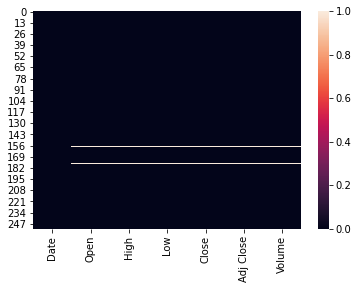

In [ ]:
sns.heatmap(crude_oil.isnull())

In [ ]:
crude_oil.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [ ]:
crude_oil['Open']=crude_oil['Open'].fillna(crude_oil['Open'].mode()[0])
crude_oil['High']=crude_oil['High'].fillna(crude_oil['High'].mode()[0])
crude_oil['Low']=crude_oil['Low'].fillna(crude_oil['Low'].mode()[0])
crude_oil['Close']=crude_oil['Close'].fillna(crude_oil['Close'].mode()[0])
crude_oil['Adj Close']=crude_oil['Adj Close'].fillna(crude_oil['Adj Close'].mode()[0])
crude_oil['Volume']=crude_oil['Volume'].fillna(crude_oil['Volume'].mode()[0])

In [ ]:
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scatter(x=crude_oil['Date'],
                         y=crude_oil['Open']
                         ))
fig.update_layout(title='Stock Price when Market Opened ',
                  xaxis=dict(title='DATE'),
                  yaxis=dict(title='PRICE'))
fig.show()


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=crude_oil['Date'],
                         y=crude_oil['Adj Close']
                         ))
fig.update_layout(title='Stock Price when Market Closed ',
                  xaxis=dict(title='DATE'),
                  yaxis=dict(title='PRICE'))
fig.show()

In [ ]:
#building model 
from sklearn.model_selection import train_test_split

#preprocessing the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [ ]:
X=crude_oil[['Open','High','Low','Volume']].values
y=crude_oil['Close'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(202, 4)

In [ ]:
y_train.shape

(202,)

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([47.60220413, 42.86925663, 47.34593558, 36.94186445, 42.01497466,
       53.08204522, 38.51017543, 64.37319669, 40.92157553, 38.62269103,
       40.30896804, 64.20091343, 40.75580461, 53.36519333, 41.40139746,
       41.47749418, 57.33411467, 47.60321638, 46.20969582, 43.38236403,
       51.86779433, 38.19960324, 61.01807468, 35.77983122, 38.98998148,
       62.91172427, 12.79818625, 40.50304898, 52.66881389, 39.18340287,
       59.40962828, 40.44538681, 39.52605767, 48.79467013, 46.84978637,
       41.00704759, 52.66212404, 14.08711586, 29.23715674, 53.24521266,
       39.34399022, 19.67777165, 56.04423426, 48.24367278, 41.90740214,
       40.25646103, 58.00825727, 38.06790243, 40.80268445, 48.03329692,
       41.23046141])

In [ ]:
y_test

array([47.619999, 42.669998, 47.619999, 36.759998, 41.34    , 52.34    ,
       38.720001, 64.440002, 41.200001, 38.560001, 40.130001, 64.599998,
       41.110001, 53.209999, 41.740002, 41.27    , 56.849998, 47.82    ,
       45.709999, 42.759998, 52.25    , 38.84    , 60.970001, 36.169998,
       39.310001, 63.      , 12.78    , 40.650002, 52.77    , 38.189999,
       59.599998, 40.200001, 39.599998, 47.619999, 46.57    , 40.290001,
       52.240002, 13.78    , 29.43    , 53.57    , 39.43    , 19.780001,
       56.23    , 47.619999, 42.34    , 40.880001, 58.560001, 37.959999,
       40.75    , 48.52    , 41.599998])

In [ ]:
lr.score(X_test,y_test)*100

99.85317111915964

In [ ]:
df_new=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])
df_new.head(20)

,Actual,Predicted
0,47.619999,47.602204
1,42.669998,42.869257
2,47.619999,47.345936
3,36.759998,36.941864
4,41.340000,42.014975
5,52.340000,53.082045
6,38.720001,38.510175
7,64.440002,64.373197
8,41.200001,40.921576
9,38.560001,38.622691
